# Phase Kickback

En este apartado vamos a seguir explorando los estados cuántico con dos qubits

## Explorando la puerta CNOT-Gate <a id="exploring-cnot"></a>

En la sección anterior, vimos algunos resultados muy básicos con la puerta CNOT. Aquí exploraremos algunos resultados más interesantes. 
. 

Vimos que podíamos entrelazar los dos qubits colocando el qubit de control en el estado $|+\rangle$:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Pero, ¿qué ocurre si ponemos el segundo qubit en superposición? 

Veamos el resultado anterior con qiskit

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

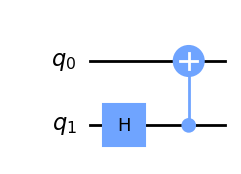

In [5]:
qc = QuantumCircuit(2)
qc.h(1) # convierto qubit 1 en X
qc.cx(1,0)
qc.draw(output='mpl')

<IPython.core.display.Latex object>

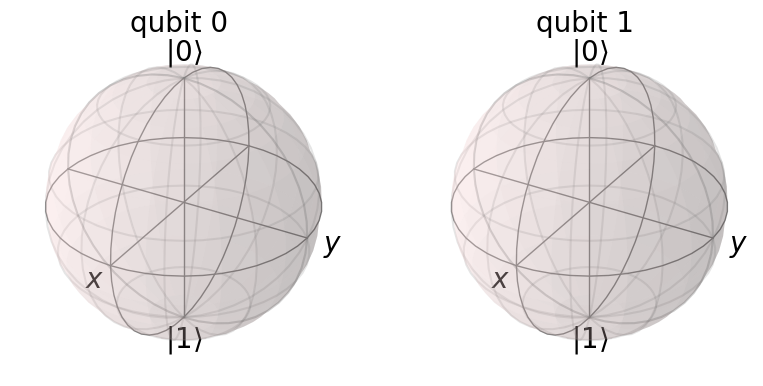

In [6]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))


Veamos ahora otro estado

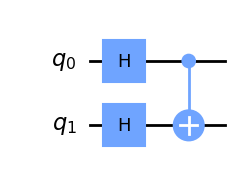

In [8]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw(output='mpl')

En el circuito anterior, tenemos la CNOT actuando sobre el estado:

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Puesto que CNOT intercambia las amplitudes de $|01\rangle$ y $|11\rangle$, no vemos ningún cambio:

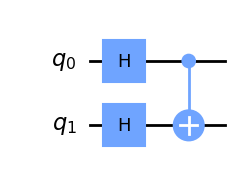

<IPython.core.display.Latex object>

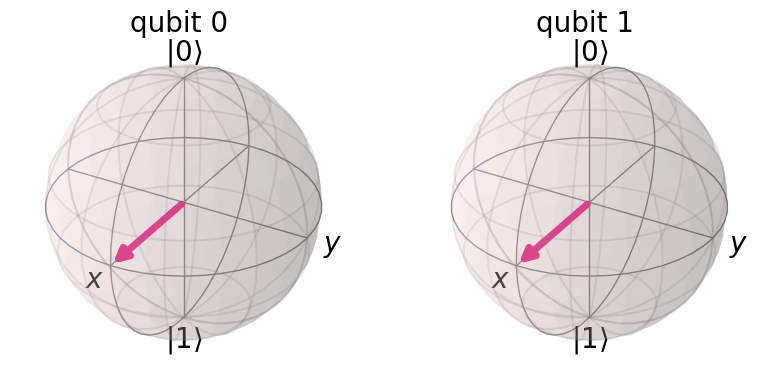

In [10]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw(output='mpl'))  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Pongamos el qubit objetivo en el estado $|-\rangle$, para que tenga una fase negativa:

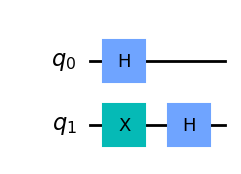

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw(output='mpl')

Esto crea el estado:

$$ |{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$

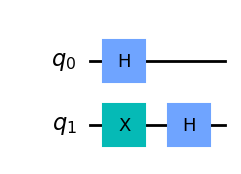

<IPython.core.display.Latex object>

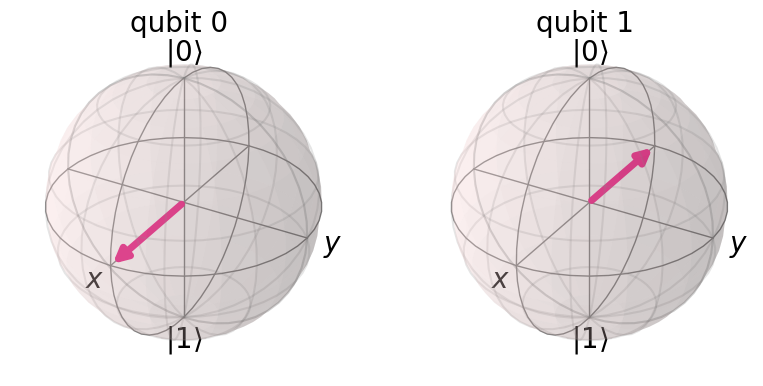

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw(output='mpl'))
# See the result
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Si el CNOT actúa sobre este estado, intercambiaremos las amplitudes de $|01\rangle$ y $|11\rangle$, dando como resultado el estado:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned}
$$


Esto es interesante, porque afecta al estado del qubit _control_ mientras que deja el estado del qubit _target_ sin cambios. 


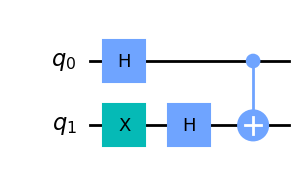

<IPython.core.display.Latex object>

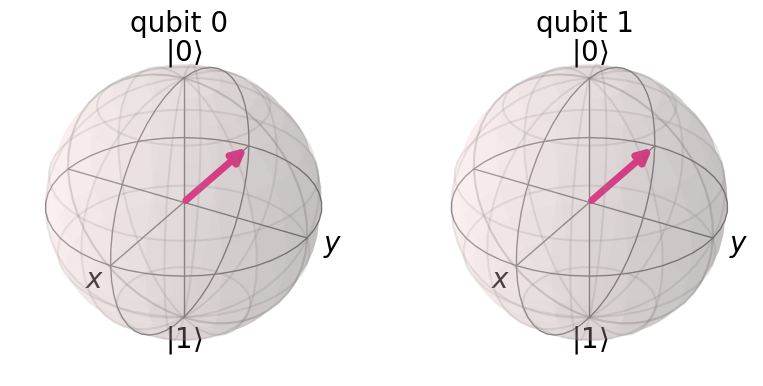

In [13]:
qc.cx(0,1)
display(qc.draw(output='mpl'))

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Si recordamos las transformaciones H-gate $|{+}\rangle \rightarrow |0\rangle$ y $|{-}\rangle \rightarrow |1\rangle$, podemos ver que envolver un CNOT en H-gates tiene el comportamiento equivalente a un CNOT actuando en la dirección opuesta: 


![cnot_identity](images/cambioCNOT.PNG)

Podemos comprobarlo utilizando el simulador Aer de Qiskit:

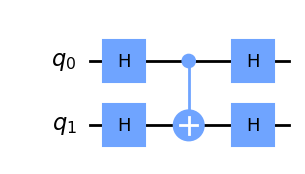

<IPython.core.display.Latex object>

In [15]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw(output='mpl')) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

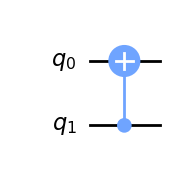

<IPython.core.display.Latex object>

In [17]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw(output='mpl'))
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

```{index} phase kickback
```
Esta identidad es un ejemplo de "retroceso de fase" (phase kickback), lo que nos lleva a la siguiente sección.... 

## 2. Phase Kickback <a id="kickback"></a>

### Explicación de la identidad del circuito CNOT <a id="explaining-identity"></a>
En la sección anterior vimos esta identidad:

![cnot_identity](images/cambioCNOT.PNG)

Este es un ejemplo de _kickback_ (o, _kickback de fase_ ) que es muy importante y se utiliza en casi todos los algoritmos cuánticos. Kickback es donde el valor propio añadido por una puerta a un qubit es "devuelto" a un qubit diferente a través de una operación controlada. Por ejemplo, vimos que realizar una puerta-X en un qubit $|{-}\rangle$ le da la fase $-1$:


$$
X|{-}\rangle = -|{-}\rangle
$$

Cuando nuestro qubit de control está en $|0\rangle$ o $|1\rangle$, esta fase afecta a todo el estado, sin embargo es una fase global y no tiene efectos observables:

$$
\begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}
$$

El efecto interesante es cuando nuestro qubit de control está en superposición. El componente del qubit de control que se encuentra en la dirección de $|1\rangle$ aplica este factor de fase al qubit objetivo *correspondiente*. Este factor de fase aplicado a su vez introduce una fase relativa en el qubit de control:


$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}
$$

Esto se puede escribir como los dos estados de qubit separables:

$$
\begin{aligned}
\text{CNOT}|{-}{+}\rangle & = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
                           & = |{-}{-}\rangle \\
\end{aligned}
$$

colocar el CNOT en las puertas H transforma los qubits de la base computacional a la base $(|+\rangle, |-\rangle)$, donde vemos este efecto. Esta identidad es muy útil en hardware, ya que algunos hardwares sólo permiten CNOTs en una dirección entre dos qubits específicos. Podemos utilizar esta identidad para superar este problema y permitir CNOTs en ambas direcciones.



### 2.2 Kickback con la puerta T-gate <a id="kickback-t-gate"></a>

Veamos otra operación controlada, la puerta T controlada: 


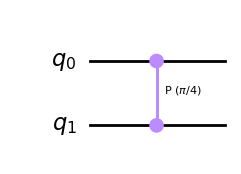

In [18]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw(output='mpl')

La puerta T-gate tiene la siguiente matriz:


$$
\text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix}
$$

Y la puerta T-gate controlada tiene la siguiente matriz:

$$
\text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix}
$$

Podemos comprobarlo utilizando el simulador Aer de Qiskit:

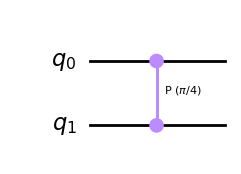

<IPython.core.display.Latex object>

In [20]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw(output='mpl'))
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

De forma más general, podemos encontrar la matriz de cualquier operación controlada-U utilizando la regla:

$$
\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}
$$

O, usando la ordenación de qubits de Qiskit:

$$
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}
$$


Si aplicamos la puerta T a un qubit en el estado $|1\rangle$, añadimos una fase de $e^{i\pi/4}$ a este qubit:

$$
T|1\rangle = e^{i\pi/4}|1\rangle
$$

Esto es _fase global_ y es inobservable. Pero si controlamos esta operación usando otro qubit en el estado $|{+}\rangle$, la fase ya no es global sino relativa, lo que cambia la _fase relativa_ en nuestro qubit de control:

$$
\begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}
$$

Esto tiene el efecto de rotar nuestro qubit de control alrededor del eje Z de la esfera de Bloch, mientras que deja el qubit objetivo sin cambios. Veamos esto en Qiskit:

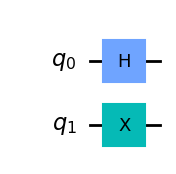

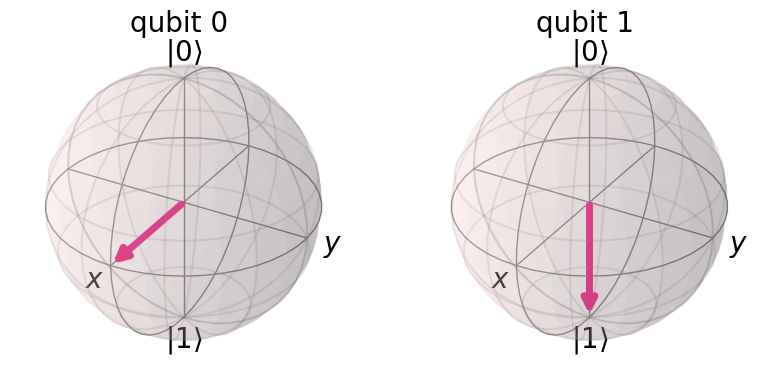

In [21]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw(output='mpl'))
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

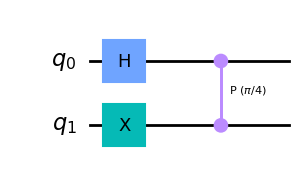

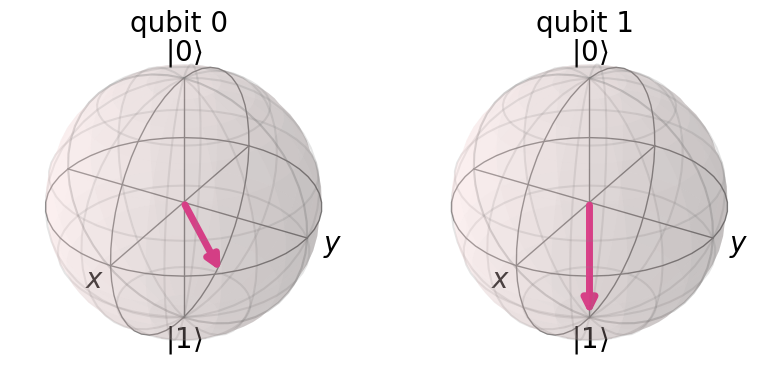

In [22]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw(output='mpl'))
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

Podemos ver que el qubit más a la izquierda ha sido rotado $\pi/4$ alrededor del eje Z de la esfera de Bloch, como era de esperar. Después de explorar este comportamiento, puede quedar claro por qué Qiskit dibuja las puertas de rotación Z controlada de esta manera simétrica (dos controles en lugar de un control y un objetivo). No hay un qubit de control o de destino claro para todos los casos.

<img src="images/pkb_z_equiv.PNG">

### Quick Ejercicios:

<ol>
<li>¿Cuál sería el estado resultante del qubit de control (q0) si el qubit objetivo (q1) estuviera en el estado $|0\rangle$? (como se muestra en el circuito de abajo)? Utiliza Qiskit para comprobar tu respuesta.
<br>
<img src="images/pkb_ex1.PNG">
</li>
<li>¿Qué le ocurriría al qubit de control (q0) si el qubit de destino (q1) estuviera en el estado $|1\rangle$, y el circuito utilizara una puerta Sdg controlada en lugar de la T controlada (como se muestra en el circuito de abajo)?
<br>
<img src="images/pkb_ex2.PNG">
</li>

<li>¿Qué pasaría con el qubit de control (q0) si estuviera en el estado $|1\rangle$ en lugar del estado $|{+}\rangle$ antes de la aplicación de la T controlada (como se muestra en el circuito de abajo)?
<br>
<img src="images/pkb_ex3.PNG">
</li>
</ol>

In [23]:
import qiskit.tools.jupyter
%qiskit_version_table